In [1]:
from scipy.optimize import root_scalar, root
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 12*cm 

In [31]:
# physical functions


def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)

def minF(w,k,G,gamma):
    if k>0:
        if k>G+gamma:
            if w!=0:
                return (2*w-np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
            else:
                return -np.sqrt(-G/2*(G+gamma-k)/k**2)*0.9
        else:
            return 0
               
    else:
        return -w*G/2/(G/2*(G+gamma)+w**2)+1/10**3
def maxF(w,k,G,gamma):
    if k>0:
        return (2*w+np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5

# def lamtest(y,w,k,Gam,sgam):
#     A = AOK(k,Gam,sgam)
#     p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
#     q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
#     return p, p**2-4*q
    # return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lamtest(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2+A/2+k**2*y**2-y*w*k
    q = Gam**2*(A/2+k**2*y**2-y*w*k)+Gam**2*(2*y*k-w)*(y*k-w)
    return p, p**2-4*q, q


def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3
def yKnix(W,K):
    return (2-np.sqrt(1-3/2*(1-K)/W**2))/3
def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2

def Foriginal(x,y,w,k,delta,Gamma,gamma):
    eqx = -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*(x**2+y**2)+2*w*k*x*y
    eqy = Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y
    return np.array([eqx,eqy])

def y1ofx(x,w,k,delta,Gamma,gamma):
    if x==0:
        return 0
    return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))

def insq(x,w,k,delta,Gamma,gamma):
    return (k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)

def y2ofx(x,w,k,delta,Gamma,gamma):
    if x==0:
        return w/k
    return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2-np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))

def Fx(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2(x,w,k,delta,Gamma,gamma):
    y = y2ofx(x,w,k,delta,Gamma,gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def m_z(x,y,omega,kappa,Gamma):
    return 1/2 -(kappa*(y**2+x**2)-omega*y)/Gamma
def set_xgird(w,k,delta,Gamma,gamma,points=False):
    grid1 = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
    pos = 0
    p1= None
    p2 = None
    if max(insq(grid1,w,k,delta,Gamma,gamma))<0:# or min(insq(grid1,w,k,delta,Gamma,gamma))>0:
        # print('no solution')
        return np.array([-2]), None
    gridpoints = []
    newgrid = np.array([0])
    if insq(grid1[0],w,k,delta,Gamma,gamma)>=0:
        if insq(grid1[0]+1/10**5,w,k,delta,Gamma,gamma)>=0:
            p1 = grid1[0]
            gridpoints.append(p1)
    for i in range(len(grid1)-1):
        f1 = insq(grid1[i],w,k,delta,Gamma,gamma)
        f2 = insq(grid1[i+1],w,k,delta,Gamma,gamma)
        if f1*f2<=0:
            r = root_scalar(insq,args=(w,k,delta,Gamma,gamma),method='bisect',bracket=(grid1[i],grid1[i+1]))
            # print(r.root)
            if p1!=None:
                p2 = r.root
                newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
                # print(np.linspace(p1,p2,30))
                gridpoints.append(p2)
                p1=None
            else:
                p1 = r.root
                gridpoints.append(p1)
    if p1!=None:
        newgrid = np.concatenate((newgrid,np.linspace(p1,grid1[-1],30)))
        gridpoints.append(grid1[-1])
    
    # print(len(gridpoints),gridpoints)
    if len(gridpoints)==2:
        # print(gridpoints[0],grid1[0])
        if gridpoints[0]==grid1[0]:
            # print(gridpoints[-1],grid1[-1])
            if gridpoints[-1]==grid1[-1]:
                if points:
                    return np.linspace(-0.5-1/10**5,0.5+1/10**5,80), np.array(gridpoints)
                return np.linspace(-0.5-1/10**5,0.5+1/10**5,80)
    if points==True:
        return newgrid[1:], np.array(gridpoints)
    return newgrid[1:]




In [3]:
#Plotting Class



class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False):
        
        fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step+1
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step+1
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            

                if self.tickprop.STRIP_OF_ZEROS_X:
                    current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                if self.tickprop.STRIP_OF_ZEROS_Y:
                    current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





In [4]:
Gam = 1
sgam = 0.2
s =1
k= np.linspace(1/10**5,10,30)
w = np.linspace(0,6,30)
d = np.linspace(-5,5,30)
xsol = np.ones((30,30,30,10))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((30,30,30))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            sol_numb = 0
            xgrid = set_xgird(wval,kval,dval,Gam,sgam)
            # print(xgrid)
            if xgrid[0]==-2:
                continue
            for j in range(len(xgrid)-1):
                
                Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                if Fl*Fu<=0:
                    r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                    xsol[ik,iw,id,sol_numb] = r.root
                    sol_numb+=1
            solution_number[ik,iw,id]=sol_numb
            if sol_numb==0:
                print(kval,wval,dval)
                
                # print(xgrid)






1e-05 0.0 0.1724137931034484
1e-05 0.0 0.5172413793103452
1e-05 0.0 0.862068965517242
1e-05 0.0 1.2068965517241388
1e-05 0.0 1.5517241379310347
1e-05 0.20689655172413793 0.1724137931034484
1e-05 0.20689655172413793 0.5172413793103452
1e-05 0.20689655172413793 0.862068965517242
1e-05 0.20689655172413793 1.2068965517241388
1e-05 0.20689655172413793 1.5517241379310347
1e-05 0.41379310344827586 0.1724137931034484
1e-05 0.41379310344827586 0.5172413793103452
1e-05 0.41379310344827586 0.862068965517242
1e-05 0.41379310344827586 1.2068965517241388
1e-05 0.41379310344827586 1.5517241379310347
1e-05 0.6206896551724138 0.1724137931034484
1e-05 0.6206896551724138 0.5172413793103452
1e-05 0.6206896551724138 0.862068965517242
1e-05 0.6206896551724138 1.2068965517241388
1e-05 0.6206896551724138 1.5517241379310347
1e-05 0.8275862068965517 0.1724137931034484
1e-05 0.8275862068965517 0.5172413793103452
1e-05 0.8275862068965517 0.862068965517242
1e-05 0.8275862068965517 1.2068965517241388
1e-05 0.827586

/tmp/ipykernel_13482/722408274.py:60: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))


3.4482824137931036 4.9655172413793105 4.655172413793103
3.4482824137931036 4.9655172413793105 5.0
3.4482824137931036 5.172413793103448 -2.2413793103448274
3.4482824137931036 5.172413793103448 -1.8965517241379306
3.4482824137931036 5.172413793103448 -1.5517241379310343
3.4482824137931036 5.172413793103448 -1.206896551724138
3.4482824137931036 5.172413793103448 -0.5172413793103443
3.4482824137931036 5.172413793103448 0.1724137931034484
3.4482824137931036 5.172413793103448 0.5172413793103452
3.4482824137931036 5.172413793103448 0.862068965517242
3.4482824137931036 5.172413793103448 1.2068965517241388
3.4482824137931036 5.172413793103448 1.5517241379310347
3.4482824137931036 5.172413793103448 1.8965517241379315
3.4482824137931036 5.172413793103448 2.2413793103448283
3.4482824137931036 5.172413793103448 2.586206896551724
3.4482824137931036 5.172413793103448 2.931034482758621
3.4482824137931036 5.172413793103448 3.275862068965518
3.4482824137931036 5.172413793103448 3.6206896551724146
3.4482

[-4.99990000e+10 -5.12976753e+10 -5.26656134e+10 -5.41085069e+10
 -5.56326902e+10 -5.72452319e+10 -5.89540448e+10 -6.07680154e+10
 -6.26971588e+10 -6.47528033e+10 -6.69478136e+10 -6.92968597e+10
 -7.18167455e+10 -7.45268114e+10 -7.74494314e+10 -8.06106327e+10
 -8.40408724e+10 -8.77760223e+10 -9.18586279e+10 -9.63395366e+10
 -1.01280026e+11 -1.06754622e+11 -1.12854886e+11 -1.19694576e+11
 -1.27416807e+11 -1.36204172e+11 -1.46293370e+11 -1.57996840e+11
 -1.71735696e+11 -1.88091476e+11 -2.07890579e+11 -2.32348294e+11
 -2.63328067e+11 -3.03840077e+11 -3.59083727e+11 -4.38880111e+11
 -5.64274429e+11 -7.89984200e+11 -1.31664033e+12 -3.94992100e+12
  3.94992100e+12  1.31664033e+12  7.89984200e+11  5.64274429e+11
  4.38880111e+11  3.59083727e+11  3.03840077e+11  2.63328067e+11
  2.32348294e+11  2.07890579e+11  1.88091476e+11  1.71735696e+11
  1.57996840e+11  1.46293370e+11  1.36204172e+11  1.27416807e+11
  1.19694576e+11  1.12854886e+11  1.06754622e+11  1.01280026e+11
  9.63395366e+10  9.18586

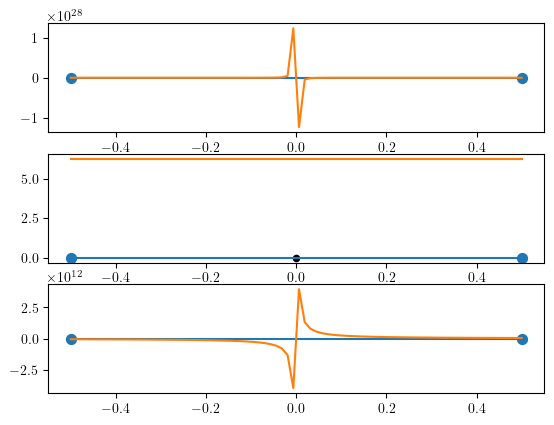

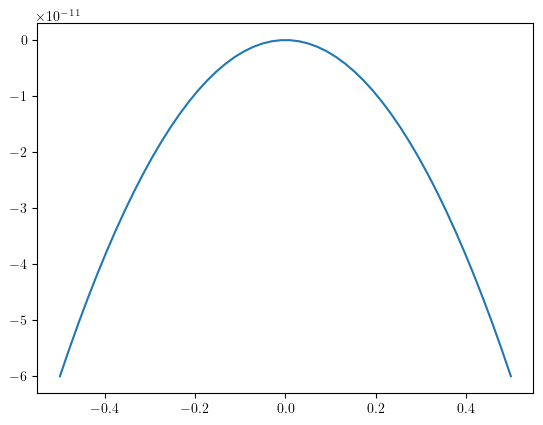

[ 0.11999939  0.11696545  0.11392407  0.11088905  0.10785104  0.10480978
  0.10177022  0.09873791  0.09569684  0.09265765  0.08962053  0.08658569
  0.08354701  0.08050405  0.07747007  0.07443185  0.07138884  0.068356
  0.06531843  0.06227544  0.05924419  0.05620761  0.05316479  0.05012523
  0.04708956  0.04404649  0.04100736  0.03797313  0.03492981  0.03190823
  0.02885985  0.02581648  0.02278014  0.01975406  0.01671195  0.01368211
  0.01062494  0.00757779  0.0045607   0.00140329 -0.00140329 -0.0045607
 -0.00757779 -0.01062494 -0.01368211 -0.01671195 -0.01975406 -0.02278014
 -0.02581648 -0.02885985 -0.03190823 -0.03492981 -0.03797313 -0.04100736
 -0.04404649 -0.04708956 -0.05012523 -0.05316479 -0.05620761 -0.05924419
 -0.06227544 -0.06531843 -0.068356   -0.07138884 -0.07443185 -0.07747007
 -0.08050405 -0.08354701 -0.08658569 -0.08962053 -0.09265765 -0.09569684
 -0.09873791 -0.10177022 -0.10480978 -0.10785104 -0.11088905 -0.11392407
 -0.11696545 -0.11999939] 0.0


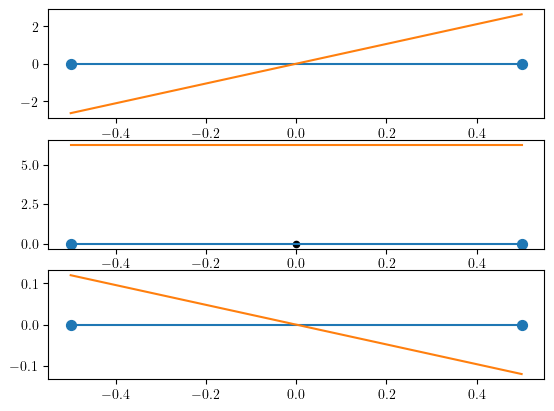

[-4.99987000e+10 -5.12973753e+10 -5.26653134e+10 -5.41082069e+10
 -5.56323902e+10 -5.72449319e+10 -5.89537448e+10 -6.07677154e+10
 -6.26968588e+10 -6.47525033e+10 -6.69475136e+10 -6.92965597e+10
 -7.18164455e+10 -7.45265114e+10 -7.74491314e+10 -8.06103327e+10
 -8.40405724e+10 -8.77757223e+10 -9.18583279e+10 -9.63392366e+10
 -1.01279726e+11 -1.06754322e+11 -1.12854586e+11 -1.19694276e+11
 -1.27416507e+11 -1.36203872e+11 -1.46293070e+11 -1.57996540e+11
 -1.71735396e+11 -1.88091176e+11 -2.07890279e+11 -2.32347994e+11
 -2.63327767e+11 -3.03839777e+11 -3.59083427e+11 -4.38879811e+11
 -5.64274129e+11 -7.89983900e+11 -1.31664003e+12 -3.94992070e+12
  3.94992130e+12  1.31664063e+12  7.89984500e+11  5.64274729e+11
  4.38880411e+11  3.59084027e+11  3.03840377e+11  2.63328367e+11
  2.32348594e+11  2.07890879e+11  1.88091776e+11  1.71735996e+11
  1.57997140e+11  1.46293670e+11  1.36204472e+11  1.27417107e+11
  1.19694876e+11  1.12855186e+11  1.06754922e+11  1.01280326e+11
  9.63398366e+10  9.18589

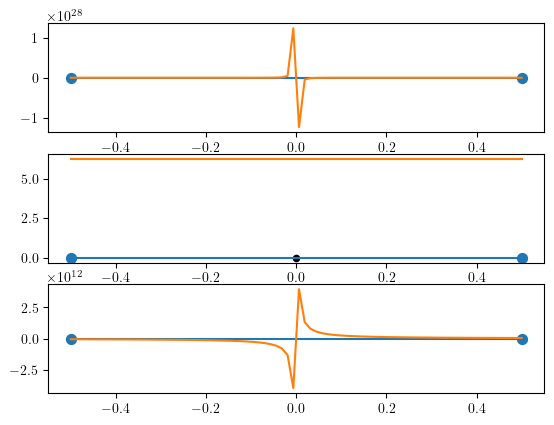

1e-05 3.0 0.0
[ 21547.47958973  21547.47958968  21547.47958964  21547.47958959
  21547.47958955  21547.4795895   21547.47958946  21547.47958942
  21547.47958938  21547.47958934  21547.4795893   21547.47958927
  21547.47958923  21547.4795892   21547.47958917  21547.47958913
  21547.4795891   21547.47958908  21547.47958905  21547.47958902
  21547.479589    21547.47958897  21547.47958895  21547.47958893
  21547.47958891  21547.47958889  21547.47958887  21547.47958886
  21547.47958884  21547.47958883  21547.47958882  21547.47958881
  21547.4795888   21547.47958879  21547.47958878  21547.47958877
  21547.47958877  21547.47958876  21547.47958876  21547.47958876
 278452.52041124 278452.52041124 278452.52041124 278452.52041123
 278452.52041123 278452.52041122 278452.52041121 278452.5204112
 278452.52041119 278452.52041118 278452.52041117 278452.52041116
 278452.52041114 278452.52041113 278452.52041111 278452.52041109
 278452.52041107 278452.52041105 278452.52041103 278452.520411
 278452.520410

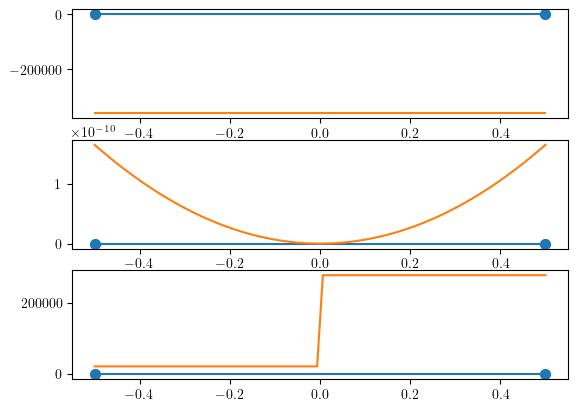

[ 0.11999939  0.1169609   0.11392407  0.11088905  0.10785104  0.10480978
  0.10177022  0.09873791  0.09569684  0.09265765  0.08962053  0.08658569
  0.08354701  0.08050405  0.07747007  0.07443185  0.07138884  0.068356
  0.06531843  0.062284    0.05924419  0.05620761  0.05316479  0.05012523
  0.04708956  0.04404649  0.04100736  0.03797313  0.03492981  0.03190823
  0.02885985  0.02581648  0.02278014  0.01972707  0.01671195  0.01368211
  0.01062494  0.00764795  0.0045607   0.00140329 -0.00140329 -0.0045607
 -0.00764795 -0.01062494 -0.01368211 -0.01671195 -0.01972707 -0.02278014
 -0.02581648 -0.02885985 -0.03190823 -0.03492981 -0.03797313 -0.04100736
 -0.04404649 -0.04708956 -0.05012523 -0.05316479 -0.05620761 -0.05924419
 -0.062284   -0.06531843 -0.068356   -0.07138884 -0.07443185 -0.07747007
 -0.08050405 -0.08354701 -0.08658569 -0.08962053 -0.09265765 -0.09569684
 -0.09873791 -0.10177022 -0.10481486 -0.10785104 -0.11088905 -0.11392407
 -0.11696545 -0.12000383] 3.0


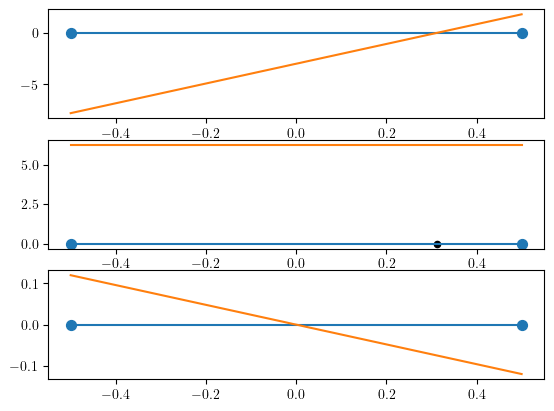

[-4.99984000e+10 -5.12970753e+10 -5.26650134e+10 -5.41079069e+10
 -5.56320902e+10 -5.72446319e+10 -5.89534448e+10 -6.07674154e+10
 -6.26965588e+10 -6.47522033e+10 -6.69472136e+10 -6.92962597e+10
 -7.18161455e+10 -7.45262114e+10 -7.74488314e+10 -8.06100327e+10
 -8.40402724e+10 -8.77754223e+10 -9.18580279e+10 -9.63389366e+10
 -1.01279426e+11 -1.06754022e+11 -1.12854286e+11 -1.19693976e+11
 -1.27416207e+11 -1.36203572e+11 -1.46292770e+11 -1.57996240e+11
 -1.71735096e+11 -1.88090876e+11 -2.07889979e+11 -2.32347694e+11
 -2.63327467e+11 -3.03839477e+11 -3.59083127e+11 -4.38879511e+11
 -5.64273829e+11 -7.89983600e+11 -1.31663973e+12 -3.94992040e+12
  3.94992160e+12  1.31664093e+12  7.89984800e+11  5.64275029e+11
  4.38880711e+11  3.59084327e+11  3.03840677e+11  2.63328667e+11
  2.32348894e+11  2.07891179e+11  1.88092076e+11  1.71736296e+11
  1.57997440e+11  1.46293970e+11  1.36204772e+11  1.27417407e+11
  1.19695176e+11  1.12855486e+11  1.06755222e+11  1.01280626e+11
  9.63401366e+10  9.18592

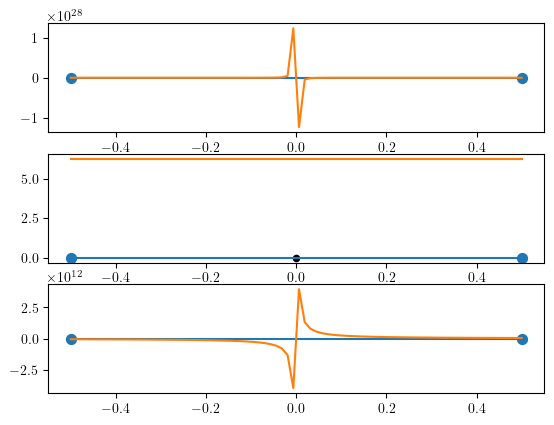

1e-05 6.0 0.0
[ 10172.37881846  10172.37881844  10172.37881842  10172.3788184
  10172.37881838  10172.37881836  10172.37881834  10172.37881832
  10172.3788183   10172.37881829  10172.37881827  10172.37881825
  10172.37881824  10172.37881822  10172.37881821  10172.3788182
  10172.37881818  10172.37881817  10172.37881816  10172.37881815
  10172.37881813  10172.37881812  10172.37881811  10172.3788181
  10172.3788181   10172.37881809  10172.37881808  10172.37881807
  10172.37881807  10172.37881806  10172.37881805  10172.37881805
  10172.37881804  10172.37881804  10172.37881804  10172.37881803
  10172.37881803  10172.37881803  10172.37881803  10172.37881803
 589827.62118197 589827.62118197 589827.62118197 589827.62118197
 589827.62118197 589827.62118196 589827.62118196 589827.62118196
 589827.62118195 589827.62118195 589827.62118194 589827.62118193
 589827.62118193 589827.62118192 589827.62118191 589827.6211819
 589827.6211819  589827.62118189 589827.62118188 589827.62118187
 589827.6211818

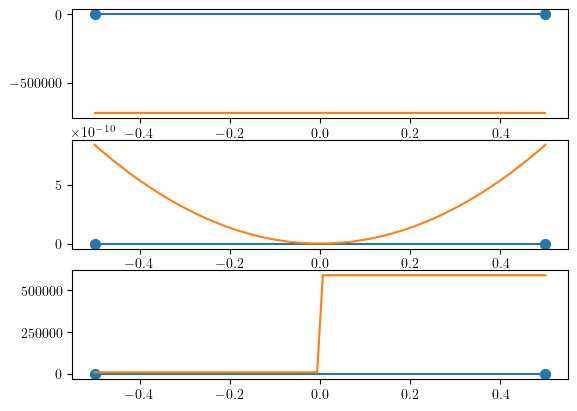

[ 0.11999939  0.1169609   0.11392407  0.11088424  0.1078461   0.10480978
  0.10177022  0.09873252  0.09569684  0.09265765  0.08962053  0.08657954
  0.08354701  0.08050405  0.07747007  0.07443185  0.07138884  0.068356
  0.06531843  0.06227544  0.05924419  0.05620761  0.05316479  0.05012523
  0.04708956  0.04404649  0.04100736  0.03797313  0.03492981  0.03189152
  0.02885985  0.02581648  0.02278014  0.01972707  0.01671195  0.01368211
  0.01062494  0.00757779  0.0045607   0.00175412 -0.00175412 -0.0045607
 -0.00757779 -0.01062494 -0.01368211 -0.01671195 -0.01972707 -0.02278014
 -0.02581648 -0.02885985 -0.03189152 -0.03492981 -0.03797313 -0.04100736
 -0.04404649 -0.04708956 -0.05012523 -0.05316479 -0.05620761 -0.05924419
 -0.062284   -0.06531843 -0.068356   -0.07138884 -0.07443185 -0.07747007
 -0.08050405 -0.08354701 -0.08658569 -0.08962053 -0.09265765 -0.09569684
 -0.09873791 -0.10177546 -0.10480978 -0.10785104 -0.11088905 -0.11392407
 -0.11696545 -0.12000383] 6.0


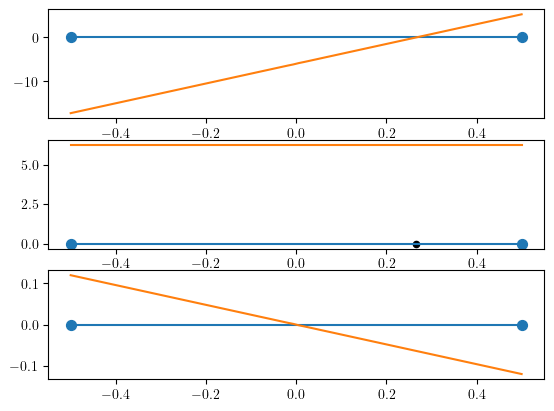

[        nan -0.30042973 -0.36831755 -0.42665328 -0.48288115 -0.54121716
 -0.60559595 -0.68094365 -0.77458674 -0.89879198 -1.07647849 -1.35656184
 -1.86593846 -3.06910176 -9.14237077  9.14237077  3.06910176  1.86593846
  1.35656184  1.07647849  0.89879198  0.77458674  0.68094365  0.60559595
  0.54121716  0.48288115  0.42665328  0.36831755  0.30042973         nan] 0.0


/tmp/ipykernel_13482/350513547.py:60: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))


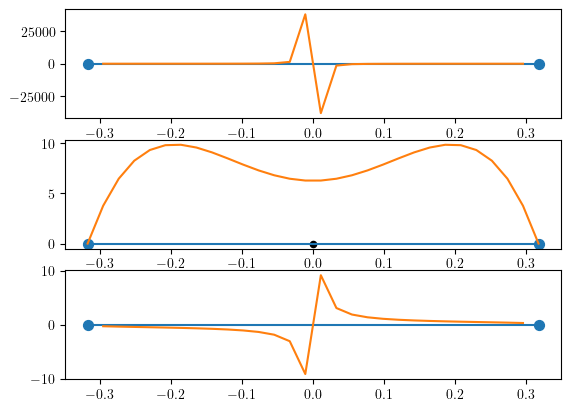

[-4.71078105e-07 -1.00604559e-01 -1.39712584e-01 -1.67913629e-01
 -1.90124745e-01 -2.08271224e-01 -2.23346005e-01 -2.35938604e-01
 -2.46429835e-01 -2.55079113e-01 -2.62068876e-01 -2.67529231e-01
 -2.71552452e-01 -2.74201807e-01 -2.75516931e-01  2.75516931e-01
  2.74201807e-01  2.71552452e-01  2.67529231e-01  2.62068876e-01
  2.55079113e-01  2.46429835e-01  2.35938604e-01  2.23346005e-01
  2.08271224e-01  1.90124745e-01  1.67913629e-01  1.39712584e-01
  1.00604559e-01  4.71146491e-07] 0.0


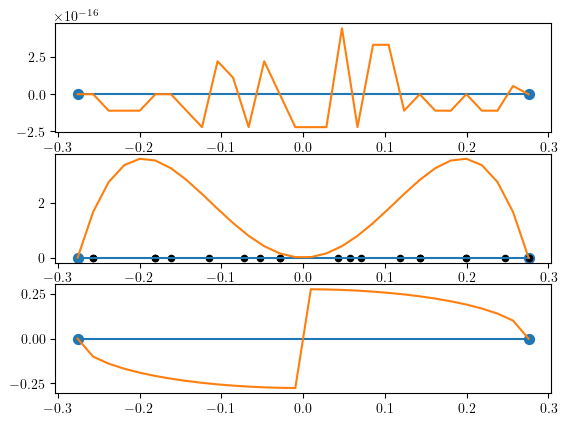

[        nan  0.0378692  -0.00295471 -0.02951976 -0.04792539 -0.06047658
 -0.06829766 -0.07200558 -0.0719659  -0.06842189 -0.06158172 -0.05169456
 -0.03912427 -0.02441145 -0.00829983  0.00829983  0.02441145  0.03912427
  0.05169456  0.06158172  0.06842189  0.0719659   0.07200558  0.06829766
  0.06047658  0.04792539  0.02951976  0.00295471 -0.0378692          nan] 0.0


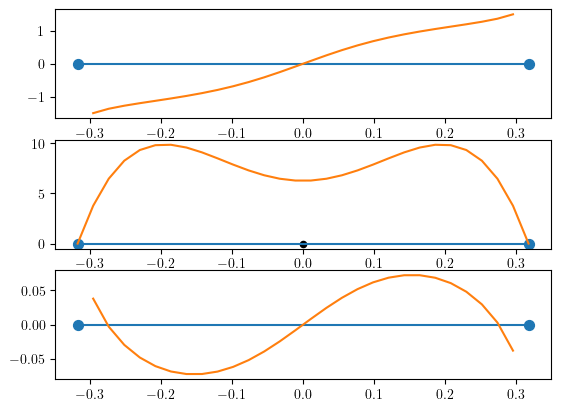

[ 1.37758808e-01  1.21395130e-02 -4.69784736e-02 -9.79670476e-02
 -1.49374346e-01 -2.08922907e-01 -2.88794686e-01 -4.13147726e-01
 -6.35973723e-01 -1.10123113e+00 -2.39946857e+00 -1.54301673e+01
  5.32907168e+00  2.68256980e+00  1.94991936e+00  1.60627988e+00
  1.40518577e+00  1.27112187e+00  1.17322444e+00  1.09649635e+00
  1.03271427e+00  9.76913637e-01  9.25816887e-01  8.77035050e-01
  8.28592400e-01  7.78553187e-01  7.24557135e-01  6.62834626e-01
  5.84626645e-01  4.02490765e-01] 3.0


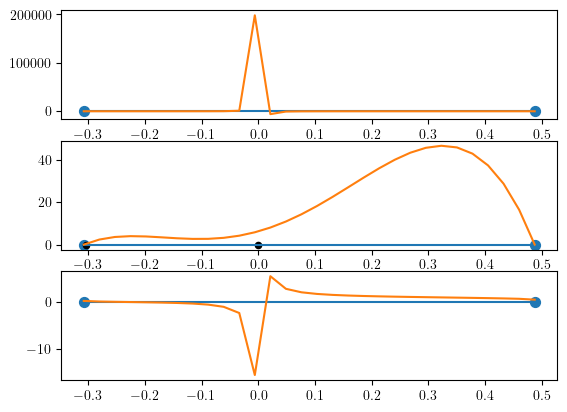

5.000005 3.0 0.0
[        nan  0.15131552  0.0935175   0.05183898  0.01901302 -0.00780579
 -0.03008491 -0.0486956  -0.06420067 -0.0769835  -0.08731371 -0.09538361
 -0.10132956 -0.10524506 -0.10718869  0.70718809  0.70524446  0.70132896
  0.69538301  0.68731311  0.6769829   0.66420007  0.648695    0.63008431
  0.60780519  0.58098638  0.54816042  0.5064819   0.44868388         nan] 3.0


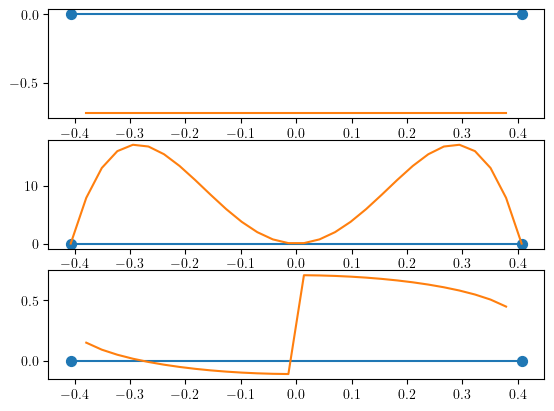

5.000005 3.0 5.0
[ 0.40248907  0.23257429  0.16813706  0.12204966  0.08595917  0.05662925
  0.0324141   0.01235771 -0.00413485 -0.01744221 -0.02779699 -0.03532046
 -0.04003661 -0.04187137 -0.04063783 -0.03600532 -0.02744841 -0.01417697
  0.00492289  0.03120064  0.06561925  0.10716168  0.15136261  0.19187083
  0.22391267  0.24530817  0.25516807  0.25216719  0.23165269  0.13776019] 3.0


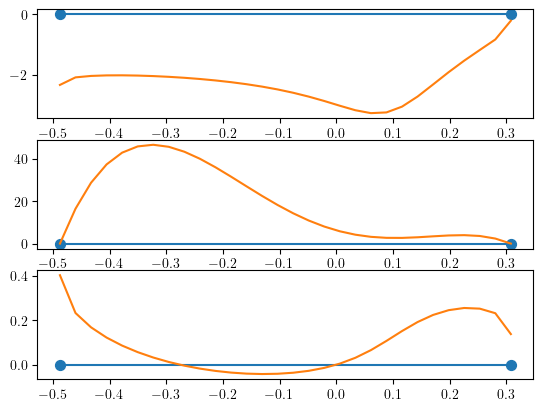

[ 2.24335955e-01  2.04318197e-01  1.85858932e-01  1.68712727e-01
  1.52695182e-01  1.37663165e-01  1.23502541e-01  1.10120165e-01
  9.74384383e-02  8.53914681e-02  7.39222559e-02  6.29805725e-02
  5.25212820e-02  4.25029603e-02  3.28866906e-02  2.36349419e-02
  1.47104437e-02  6.07496522e-03 -2.31211185e-03 -1.04955774e-02
 -1.85267507e-02 -2.64667477e-02 -3.43911985e-02 -4.23973159e-02
 -5.06148892e-02 -5.92240478e-02 -6.84851884e-02 -7.87918049e-02
 -9.07688105e-02 -1.05466784e-01 -1.24771562e-01 -1.52324347e-01
 -1.95664970e-01 -2.70907395e-01 -4.09913297e-01 -6.64935054e-01
 -1.12302107e+00 -1.99747826e+00 -4.08506807e+00 -1.46048546e+01
  1.70041184e+01  6.47822555e+00  4.37706371e+00  3.47837694e+00
  2.97993078e+00  2.66304937e+00  2.44368679e+00  2.28265488e+00
  2.15922618e+00  2.06141207e+00  1.98179799e+00  1.91555262e+00
  1.85939324e+00  1.81101122e+00  1.76873549e+00  1.73132642e+00
  1.69784467e+00  1.66756513e+00  1.63991877e+00  1.61445239e+00
  1.59080016e+00  1.56866

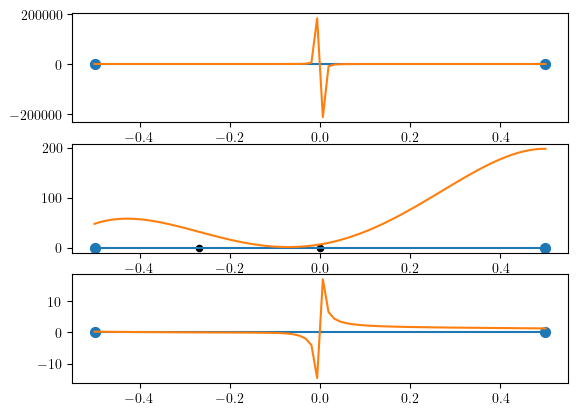

5.000005 6.0 0.0
[ 0.16873472  0.15447979  0.14101602  0.12827565  0.11620154  0.10474495
  0.09386395  0.08352215  0.07368778  0.06433287  0.05543273  0.0469654
  0.03891127  0.0312528   0.0239742   0.01706125  0.01050108  0.00428204
 -0.00160646 -0.00717403 -0.01242942 -0.0173806  -0.02203485 -0.02639877
 -0.0304784  -0.03427922 -0.03780622 -0.04106392 -0.04405639 -0.04678734
 -0.04926004 -0.05147746 -0.05344217 -0.05515647 -0.0566223  -0.05784133
 -0.05881493 -0.05954419 -0.06002991 -0.06027264  1.26027144  1.26002871
  1.25954299  1.25881373  1.25784013  1.2566211   1.25515527  1.25344097
  1.25147626  1.24925884  1.24678614  1.24405519  1.24106272  1.23780502
  1.23427802  1.2304772   1.22639757  1.22203365  1.2173794   1.21242822
  1.20717283  1.20160526  1.19571676  1.18949772  1.18293755  1.1760246
  1.168746    1.16108753  1.1530334   1.14456607  1.13566593  1.12631102
  1.11647665  1.10613485  1.09525385  1.08379726  1.07172315  1.05898278
  1.04551901  1.03126408] 6.0


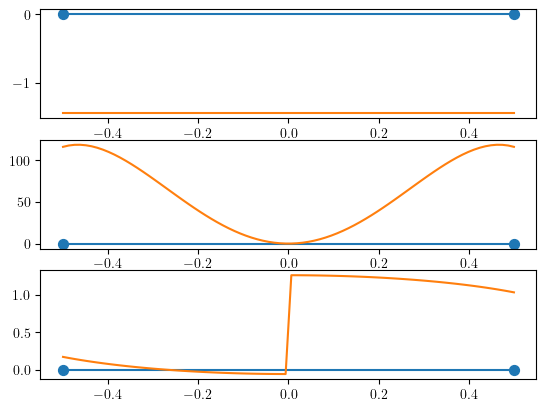

5.000005 6.0 5.0
[ 0.13787085  0.12628947  0.11528172  0.10481401  0.09485693  0.08538461
  0.07637421  0.06780551  0.05966054  0.05192337  0.04457981  0.0376173
  0.03102468  0.02479214  0.01891109  0.01337409  0.00817482  0.003308
 -0.00123056 -0.00544398 -0.0093343  -0.01290234 -0.01614769 -0.01906852
 -0.02166141 -0.02392109 -0.02584011 -0.02740835 -0.02861241 -0.02943479
 -0.02985262 -0.02983607 -0.02934592 -0.02833012 -0.02671853 -0.02441505
 -0.02128494 -0.01713442 -0.01167595 -0.00446715  0.005201    0.01851607
  0.03754657  0.06592667  0.10941692  0.17358006  0.25554832  0.34235361
  0.42293183  0.49320971  0.55310118  0.6038262   0.64680451  0.68331168
  0.71440725  0.74094748  0.76361877  0.78297136  0.79944792  0.81340626
  0.825137    0.83487713  0.84282045  0.84912554  0.85392197  0.857315
  0.85938919  0.86021111  0.85983134  0.85828583  0.85559664  0.85177223
  0.84680706  0.84068055  0.83335517  0.8247733   0.81485248  0.80347784
  0.79049031  0.77566725] 6.0


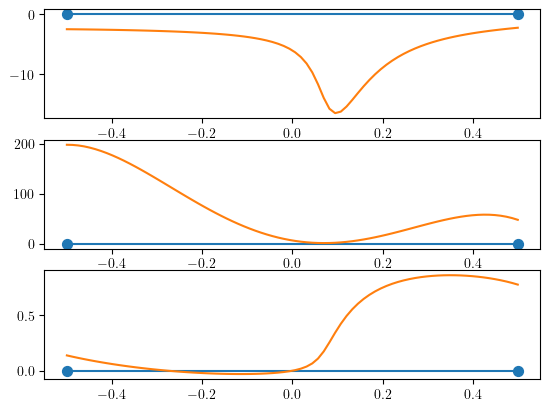

[-0.05747375 -0.14423538 -0.18195449 -0.21209791 -0.23903794 -0.26489511
 -0.29132233 -0.32013881 -0.3538905  -0.39678023 -0.45674203 -0.55105184
 -0.7254057  -1.14900095 -3.34657311  3.34657311  1.14900095  0.7254057
  0.55105184  0.45674203  0.39678023  0.3538905   0.32013881  0.29132233
  0.26489511  0.23903794  0.21209791  0.18195449  0.14423538  0.05747375] 0.0


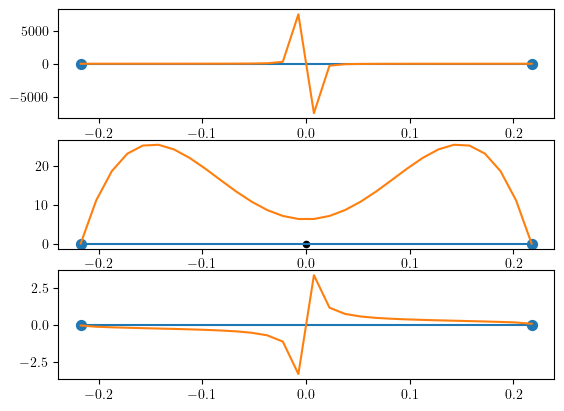

[        nan -0.07654862 -0.10630537 -0.12776316 -0.14466329 -0.15847069
 -0.16994089 -0.17952242 -0.18750505 -0.19408617 -0.19940458 -0.20355929
 -0.20662051 -0.20863636 -0.20963702  0.20963702  0.20863636  0.20662051
  0.20355929  0.19940458  0.19408617  0.18750505  0.17952242  0.16994089
  0.15847069  0.14466329  0.12776316  0.10630537  0.07654862         nan] 0.0


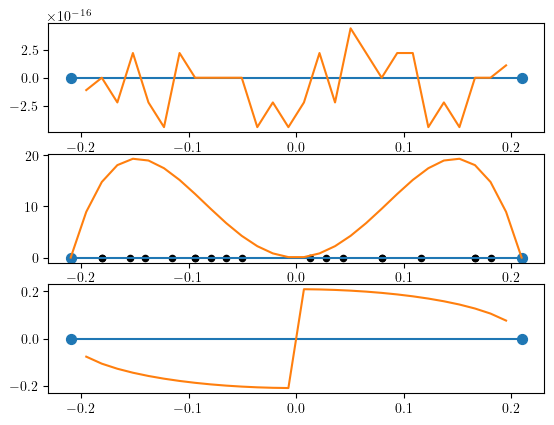

[ 0.05747253 -0.02077456 -0.0486168  -0.06716564 -0.0803026  -0.08945079
 -0.0952375  -0.09790933 -0.09747187 -0.09374004 -0.08635957 -0.07484582
 -0.05871727 -0.03785357 -0.01313097  0.01313097  0.03785357  0.05871727
  0.07484582  0.08635957  0.09374004  0.09747187  0.09790933  0.0952375
  0.08945079  0.0803026   0.06716564  0.0486168   0.02077456 -0.05747253] 0.0


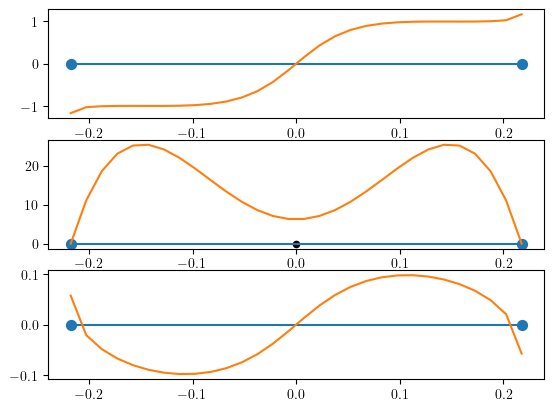

[            nan  7.33149711e-03 -2.96549758e-02 -5.80638111e-02
 -8.24111031e-02 -1.04880295e-01 -1.27248381e-01 -1.51740358e-01
 -1.82201768e-01 -2.27029865e-01 -3.08731219e-01 -5.03160744e-01
 -1.20561759e+00  3.21631461e+01  1.67140042e+00  1.02863571e+00
  8.11987998e-01  7.02571518e-01  6.35055375e-01  5.87578038e-01
  5.50749121e-01  5.19820693e-01  4.92062705e-01  4.65696485e-01
  4.39378065e-01  4.11874520e-01  3.81739168e-01  3.46697963e-01
  3.01490563e-01             nan] 3.0


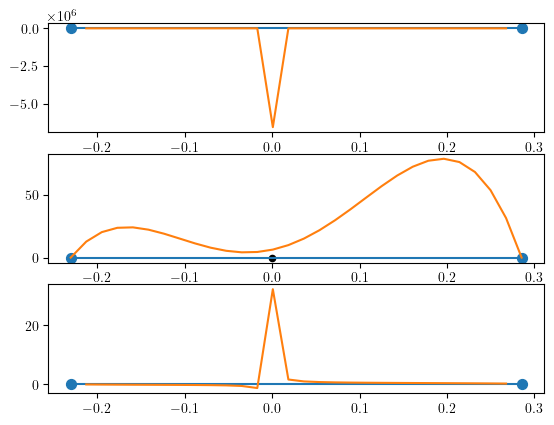

10.0 3.0 0.0
[        nan  0.05589302  0.0193108  -0.00706887 -0.02784548 -0.04481996
 -0.05892113 -0.07070043 -0.08051408 -0.08860474 -0.09514307 -0.10025077
 -0.10401415 -0.10649239 -0.10772258  0.40772258  0.40649239  0.40401415
  0.40025077  0.39514307  0.38860474  0.38051408  0.37070043  0.35892113
  0.34481996  0.32784548  0.30706887  0.2806892   0.24410698         nan] 3.0


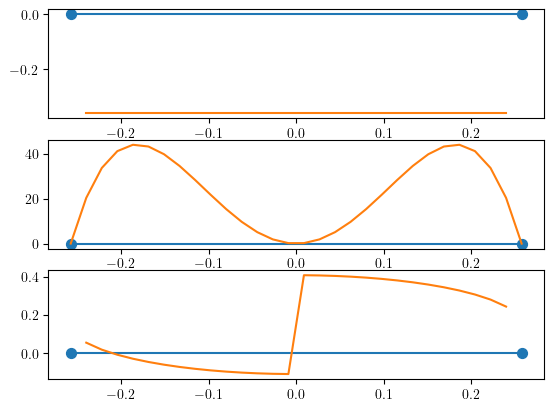

[        nan  0.09187417  0.05331475  0.02594083  0.00474596 -0.01219804
 -0.02585427 -0.03675821 -0.04520952 -0.05134961 -0.05518766 -0.05659313
 -0.05525258 -0.05057268 -0.04148828 -0.02611861 -0.00136801  0.03625571
  0.08503854  0.13355304  0.17197005  0.19878558  0.21590983  0.22532144
  0.22833408  0.22557769  0.21698319  0.20145147  0.17518801         nan] 3.0


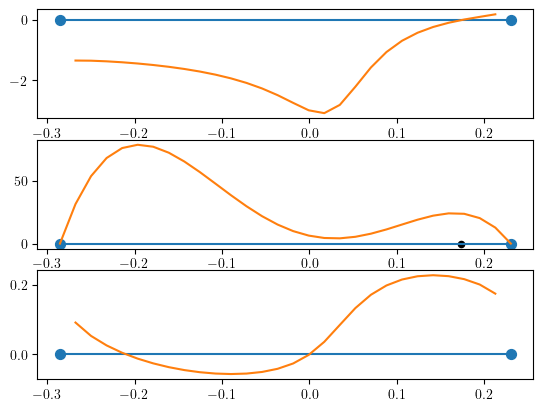

[            nan  1.38573785e-01  8.92986663e-02  5.33589724e-02
  2.46616229e-02  7.39742997e-04 -1.97919557e-02 -3.79448446e-02
 -5.47388252e-02 -7.17125060e-02 -9.24027430e-02 -1.29684535e-01
 -2.75987331e-01 -2.04061143e+00  2.22353020e+00  1.24787630e+00
  1.01857346e+00  9.13857012e-01  8.51150426e-01  8.06796356e-01
  7.71406173e-01  7.40424779e-01  7.11264344e-01  6.82204648e-01
  6.51869541e-01  6.18882104e-01  5.81474501e-01  5.36677859e-01
  4.77377168e-01             nan] 6.0


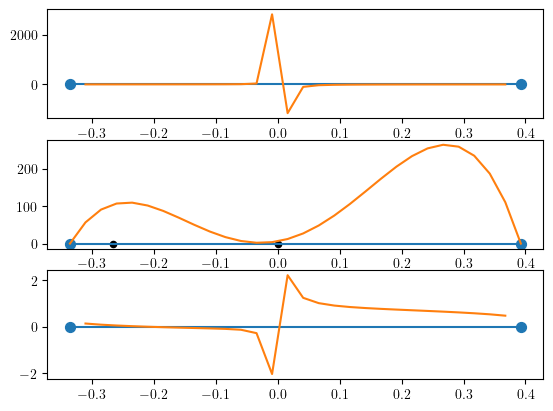

10.0 6.0 0.0
[        nan  0.16641324  0.11448404  0.07703757  0.04754476  0.02344914
  0.00343224 -0.01328872 -0.0272194  -0.03870425 -0.04798554 -0.05523602
 -0.06057821 -0.06409613 -0.06584241  0.66584241  0.66409613  0.66057821
  0.65523602  0.64798554  0.63870425  0.6272194   0.61328872  0.59656776
  0.57655086  0.55245524  0.52296243  0.48551596  0.43358676         nan] 6.0


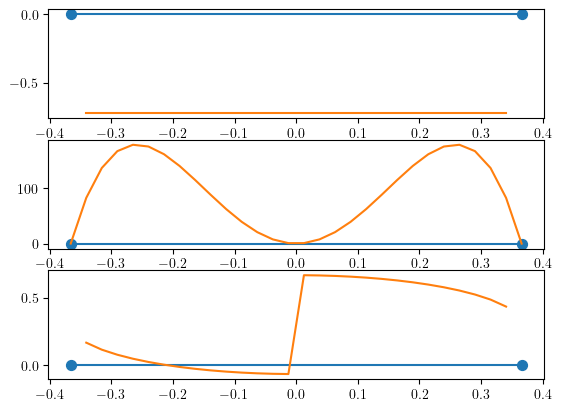

10.0 6.0 5.0
[        nan  0.19066     0.13635462  0.09734492  0.06672028  0.04179318
  0.02119412  0.00412935 -0.00988797 -0.02115142 -0.02980686 -0.03585322
 -0.03908881 -0.03894013 -0.03393114 -0.01967908  0.02151752  0.15507028
  0.31169997  0.39808977  0.44459743  0.46984006  0.48202801  0.48500265
  0.48055599  0.46928943  0.45080894  0.4232905   0.38107614         nan] 6.0


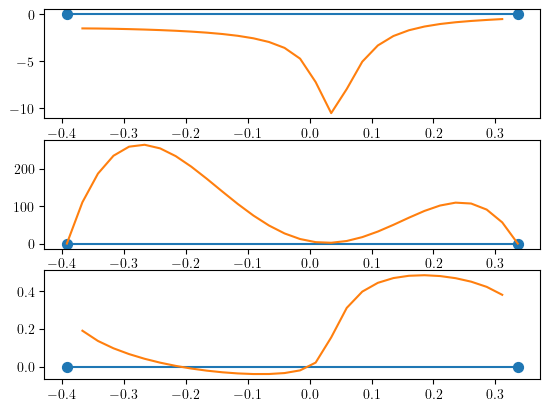

In [32]:
s =1
x_range = np.linspace(-0.5,0.5)
gridpoints = 3
k= np.linspace(1/10**5,10,gridpoints)
w = np.linspace(0,6,gridpoints)
d = np.linspace(-5,5,gridpoints)
xsol = np.ones((gridpoints,gridpoints,gridpoints,30))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((gridpoints,gridpoints,gridpoints))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            sol_numb = 0
            xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
            Func = np.zeros_like(xgrid)
            if xgrid[0]==-2:
                plt.figure()
                plt.plot(x_range,insq(x_range,wval,kval,dval,Gam,sgam))
                plt.show()
                continue
            for j in range(len(xgrid)-1):
                
                Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                if Fl*Fu<=0:
                    r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                    xsol[ik,iw,id,sol_numb] = r.root
                    sol_numb+=1
            solution_number[ik,iw,id]=sol_numb
            if sol_numb==0:
                print(kval,wval,dval)
            fig, ax = plt.subplots(3,1)
            for n in range(3):
                for i,x in enumerate(xgrid):
                    if n==0:
                        Func[i]=Fx(x,wval,kval,dval,Gam,sgam,1)
                    elif n==1:
                        Func[i]=insq(x,wval,kval,dval,Gam,sgam)
                    else:
                        Func[i]=y1ofx(x,wval,kval,dval,Gam,sgam)
                for j in range(len(points)):
                    if j%2==0:
                        ax[n].plot(points[j:j+2],np.zeros_like(points[j:j+2]))
                ax[n].scatter(points,np.zeros_like(points),s=50)    
                ax[n].plot(xgrid,Func)
            for soli in range(sol_numb):
                ax[-2].scatter(xsol[ik,iw,id,soli],0,s=20,color="0")
            print(Func,wval)
            plt.show()
            

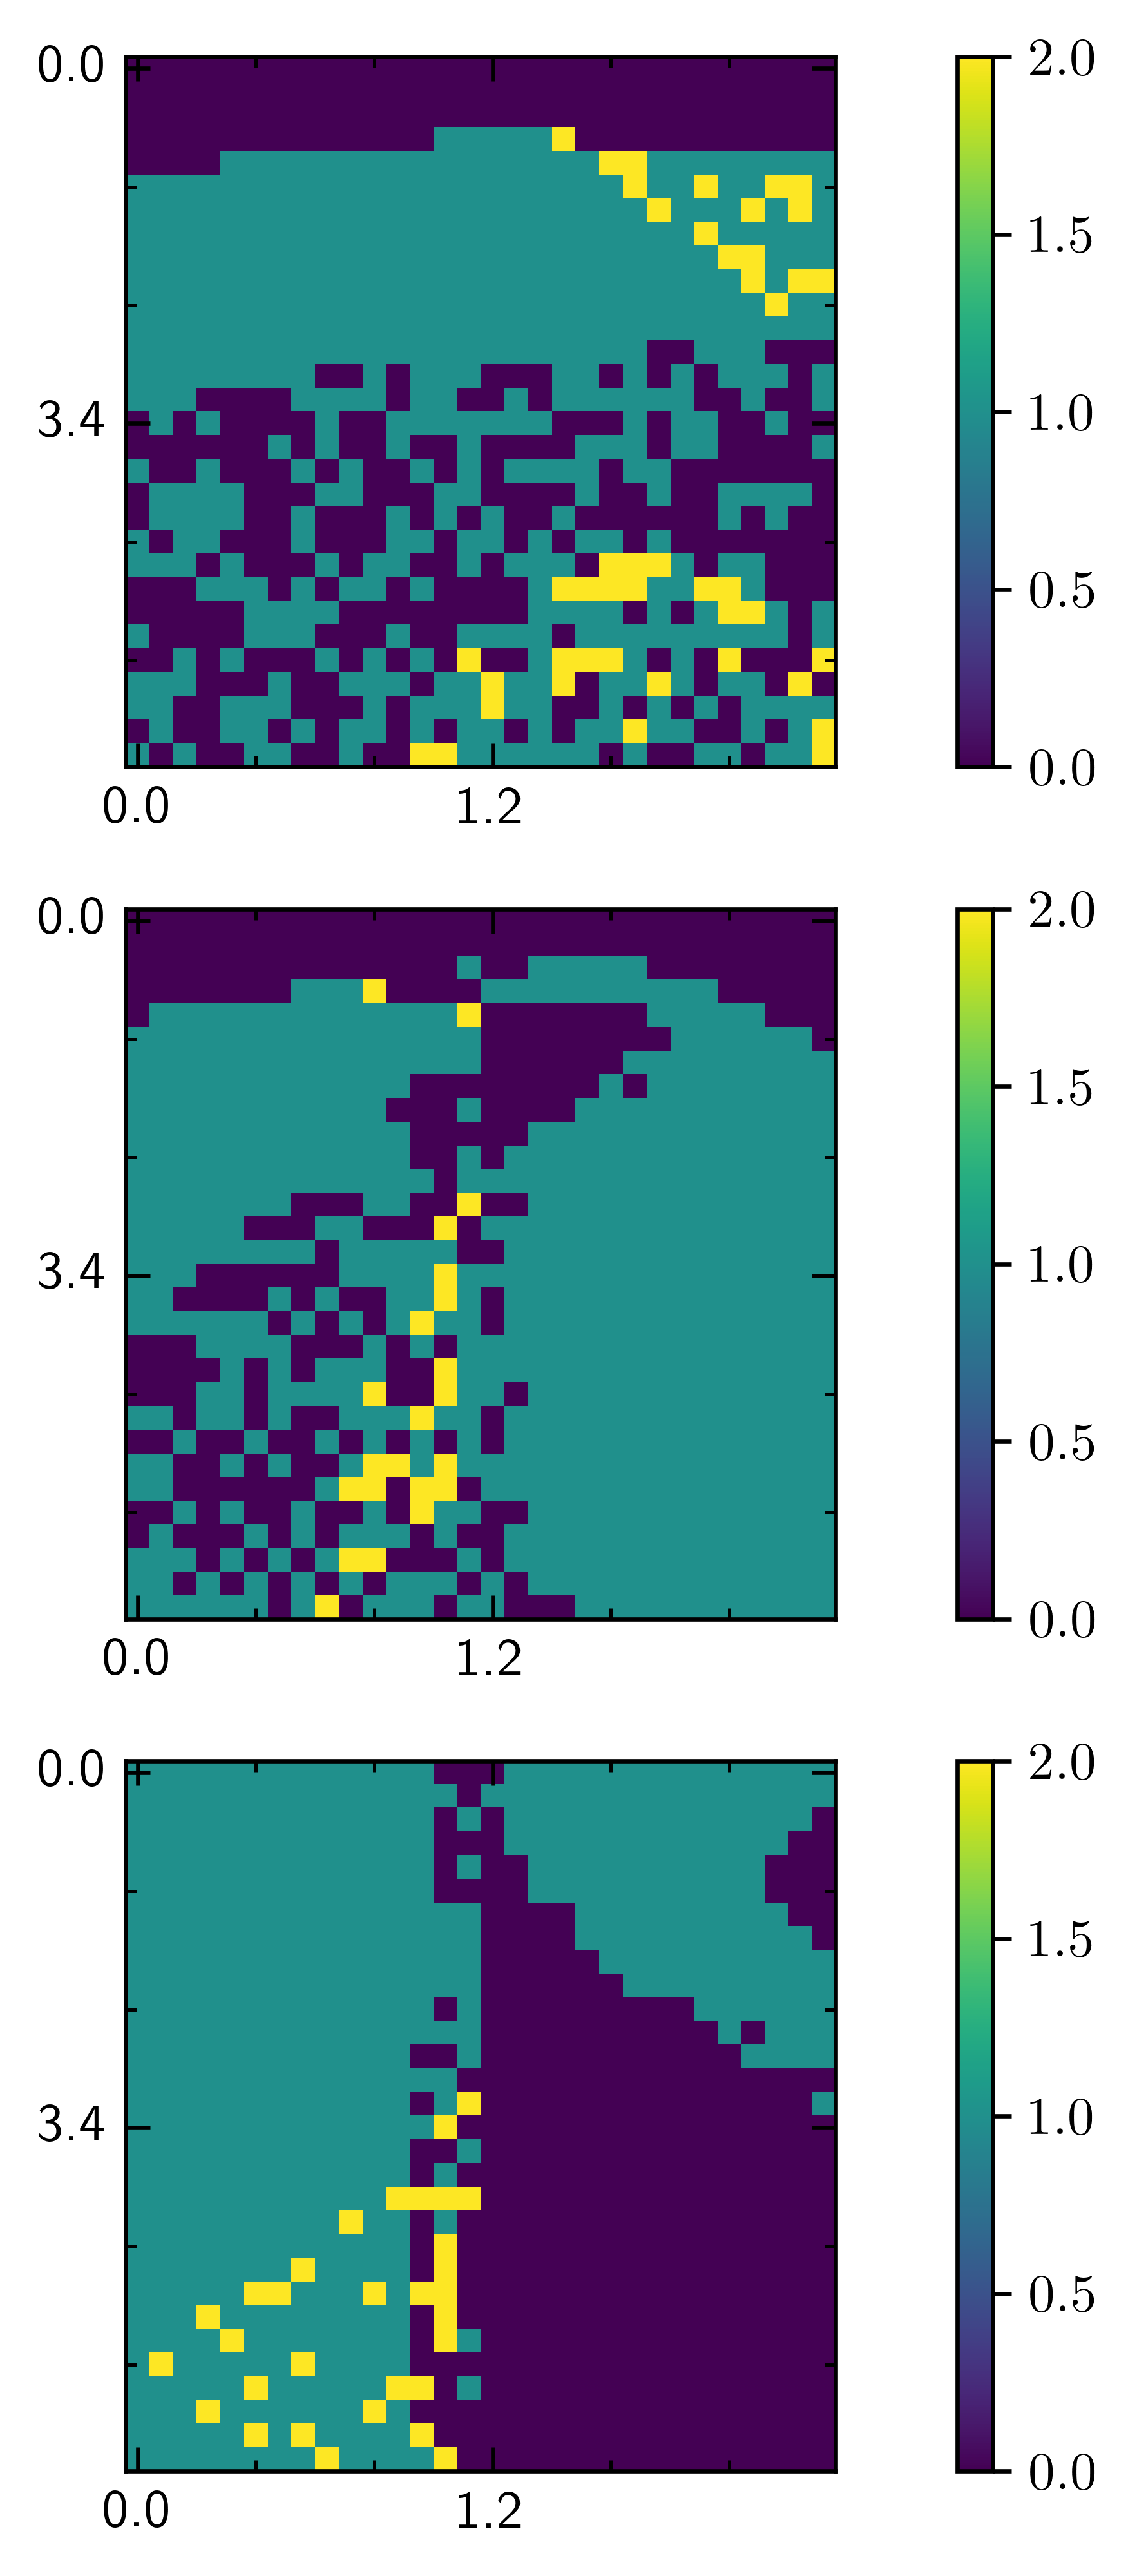

In [46]:
tickformat = Format(xscale=w,yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(3,1),dots_per_inch=600)
plots = [solution_number[:,:,5],solution_number[:,9,:],solution_number[6,:,:]]
for i in range(3):
    im = ax[i].imshow(plots[i])#,extent=(-0.5,64.5,39.5,-0.5))
    cbar = fig.colorbar(im,ax=ax[i],orientation='vertical')
plt.show()



In [ ]:
from sympy.abc import gamma, G, kappa, omega, delta, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify, simplify, expand
import numpy as np
m = Matrix([x,y,z])
glx = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
gly = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
glz = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([m[0],m[1],m[2]])
gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],jac_gl)
# gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
mz= 1/2 - 1/G*(kappa*(m[0]**2+m[1]**2)-omega*m[1])
jac_gl = simplify(expand(jac_gl.subs(z,mz)))
jac_gl

Matrix([
[(G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G,                                                                     -delta/2,         kappa*x],
[                                                                     delta/2, (G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G, kappa*y - omega],
[                                                                  -2*kappa*x,                                                           -2*kappa*y + omega,              -G]])

In [57]:
sol_index = []
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            if solution_number[ik,iw,id]>0:
                sol_index.append([ik,iw,id,int(solution_number[ik,iw,id])])

[[-3.11355888e+00]
 [ 1.16687215e-11]
 [ 0.00000000e+00]]


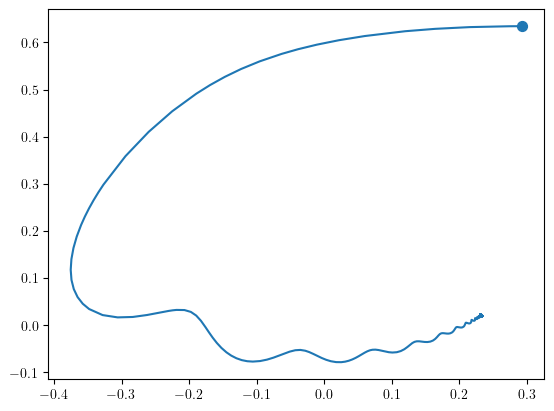

In [62]:
jk, jw,jd, solnumb = sol_index[-4]
kval, wval, dval = k[jk], w[jw], d[jd]

plt.figure()
for sol in xsol[jk,jw,jd,:solnumb]:
    if sol!=0:
        y = y1ofx(sol,wval,kval,dval,Gam,sgam)
        z= m_z(sol,y,wval,kval,Gam)
        plt.scatter(sol,y,s=50)
        mstart = np.array([sol,y,z])
        print(gl_np(0,mstart,wval,kval,dval,Gam,sgam))
arguments = wval,kval, dval, Gam, sgam
traj = solve_ivp(gl_np,(0,1500),mstart,'LSODA',args=arguments)

plt.plot(traj.y[0],traj.y[1])
plt.show()


In [10]:
a  = np.array([1,2,3])
a[2:5]


array([3])